## **House Rent Prediction**

# Context :
Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.
In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

# Structure of the Dataset :


*   BHK - Number of Bedrooms, Hall, Kitchen
*   Size - Size of the Houses/Apartments/Flats in Square Feet
*   Floor - Houses/Apartments/Flats situated in which Floor and Total Number of Floors
*   Area Type - Size of the Houses/Apartments/Flats calculated on
*   Area Locality - Locality of the Houses/Apartments/Flats
*   City - City where the Houses/Apartments/Flats are Located
*   Furnishing Status - Furnishing Status of the Houses/Apartments/Flats
*   Tenant Preferred - Type of Tenant Preferred by the Owner or Agent
*   Bathroom - Number of Bathrooms
*   Point of Contact - Whom should you contact for more information regarding the Houses/Apartments/Flats

Importing necessary Python libraries:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset

In [ ]:
rent_data = pd.read_csv('House_Rent_Dataset.csv')


In [ ]:
rent_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Checking Shape of the Dataset

In [ ]:
rent_data.shape

(4746, 12)

Information about the Dataset

In [ ]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


checking if the data contains null values or not:

In [ ]:
rent_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

A look at the descriptive statistics of the data:

In [ ]:
rent_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Now a look at the mean, median, highest, and lowest rent of the houses:

In [ ]:
print(f"Mean Rent: {rent_data.Rent.mean()}")
print(f"Median Rent: {rent_data.Rent.median()}")
print(f"Highest Rent: {rent_data.Rent.max()}")
print(f"Lowest Rent: {rent_data.Rent.min()}")

Mean Rent: 34993.45132743363
Median Rent: 16000.0
Highest Rent: 3500000
Lowest Rent: 1200


Checking number of vacant houses:

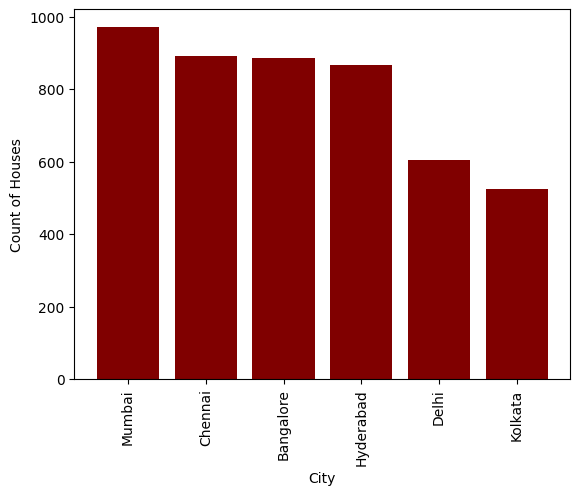

In [ ]:
city_house = rent_data.City.value_counts()
plt.bar(city_house.index, city_house.values, color = 'maroon')
plt.xlabel("City")
plt.ylabel("Count of Houses")
plt.xticks(rotation = 'vertical')
plt.show()

Bar Plot on Different Types of Furnishing Status

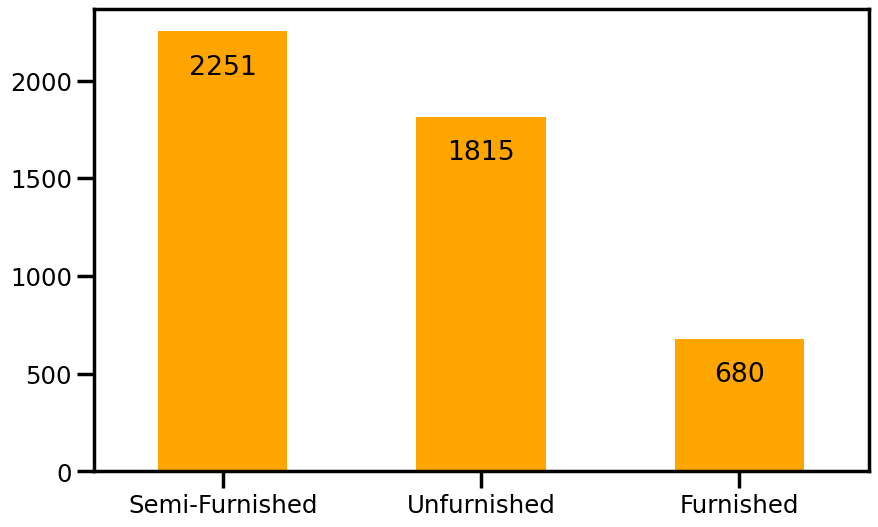

In [ ]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (10, 6))
ax = rent_data["Furnishing Status"].value_counts().plot(kind = 'bar', color = "Orange", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250), ha = 'center', va = 'bottom', color = 'Black')

Bar Plot on Different Types of Tenant Preferred

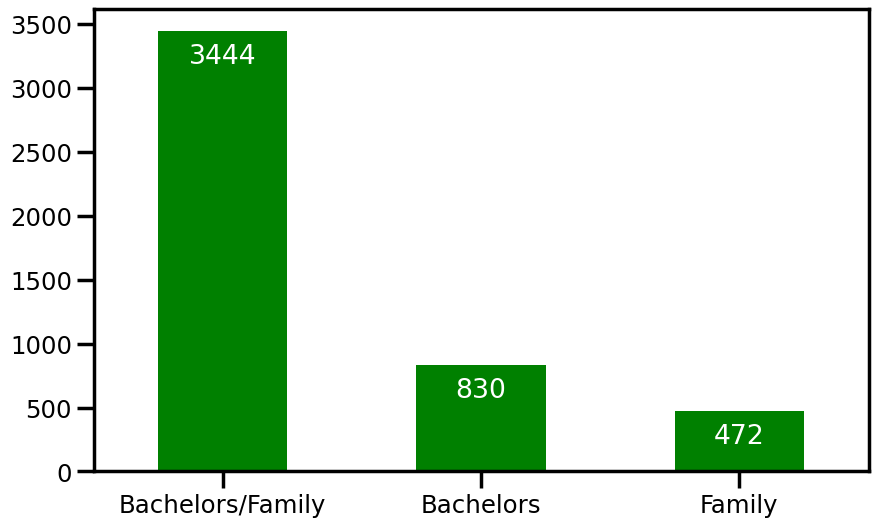

In [ ]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (10, 6))
ax = rent_data["Tenant Preferred"].value_counts().plot(kind = 'bar', color = "Green", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300), ha = 'center', va = 'bottom', color = 'White')

Pie Plot on Cities to check the distribution

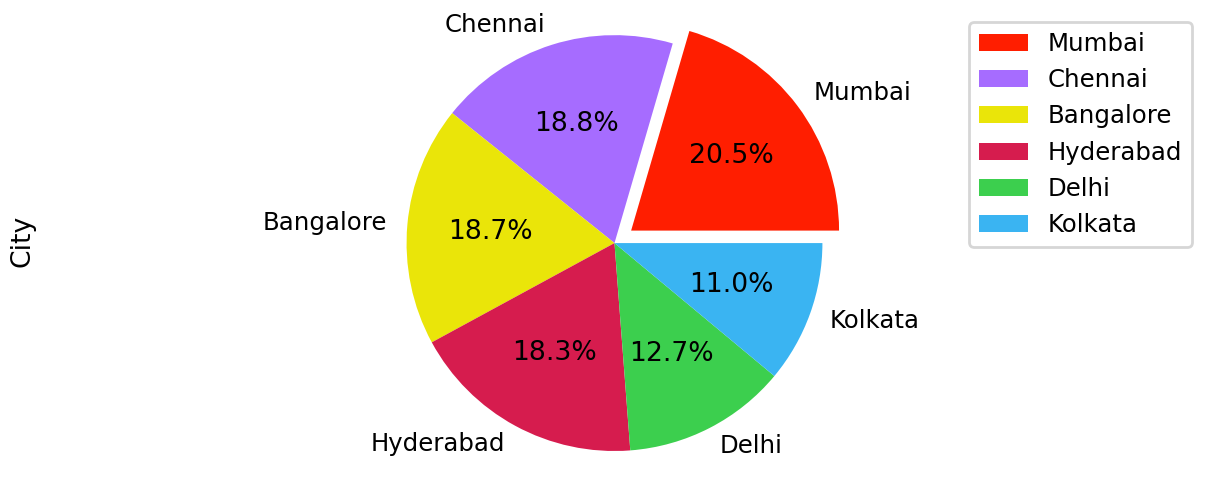

In [ ]:
plt.figure(figsize = (15, 6))
counts = rent_data["City"].value_counts()
explode = (0.1, 0, 0, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind = 'pie', colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

Scatter Plot on House Rents vs House Sizes

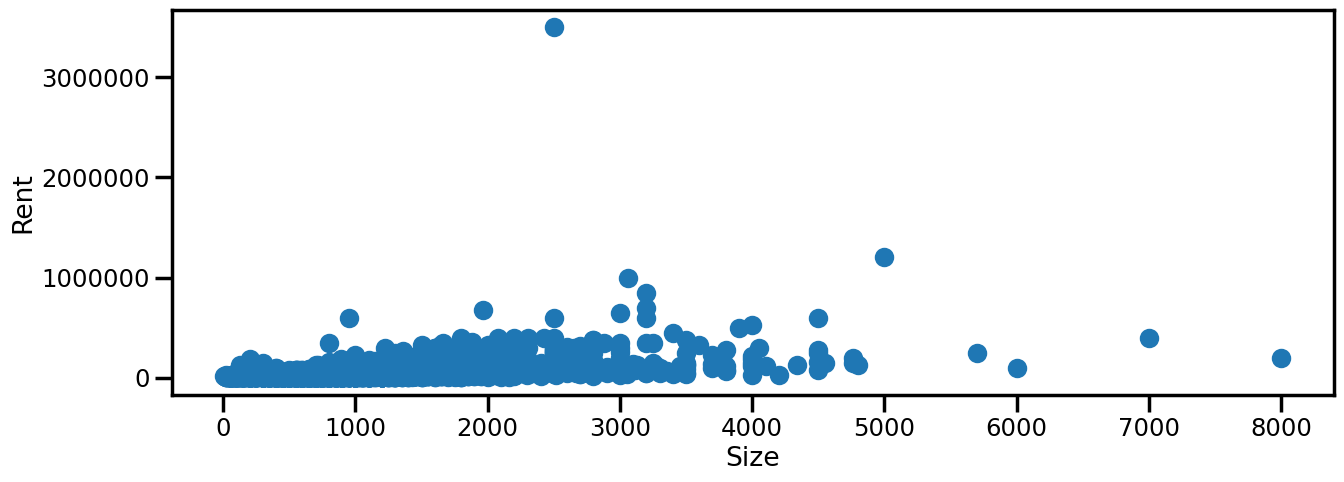

In [ ]:
plt.figure(figsize = (15, 5))
plt.ticklabel_format(style = 'plain')
plt.scatter(rent_data["Size"], rent_data["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent");

Relationship between House Rent vs House Sizes

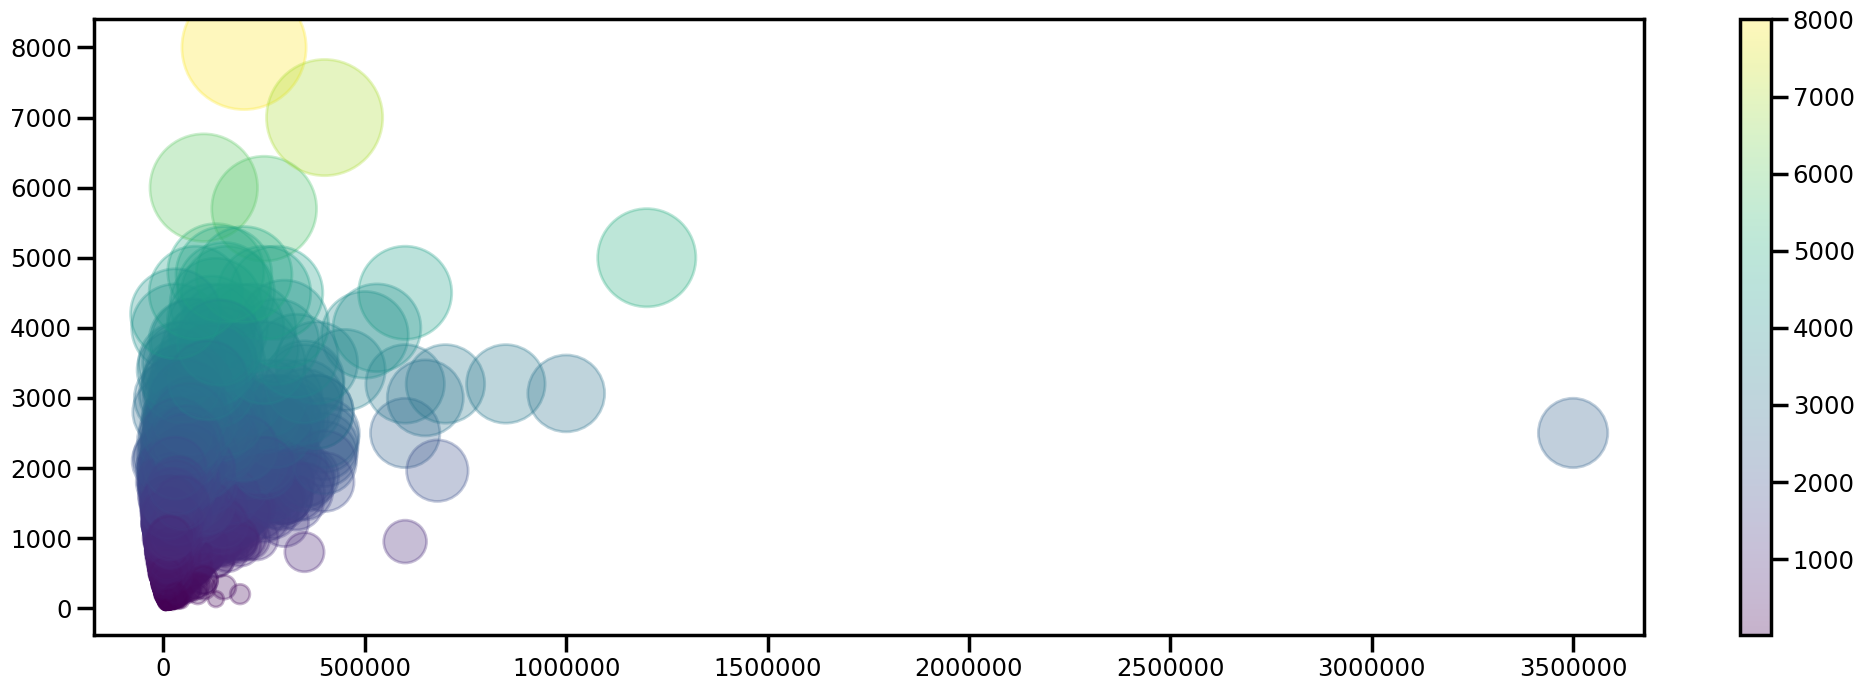

In [ ]:
x = rent_data["Rent"]
y = rent_data["Size"]
colors = rent_data["Size"]
sizes = rent_data["Size"]

plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(x, y, c = colors, s = sizes, alpha = 0.3, cmap = 'viridis')
plt.colorbar();

Bar Plot for City vs House Rent

<ipython-input-18-97a71d8b68dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = rent_data["City"], y = rent_data["Rent"], palette = "nipy_spectral")


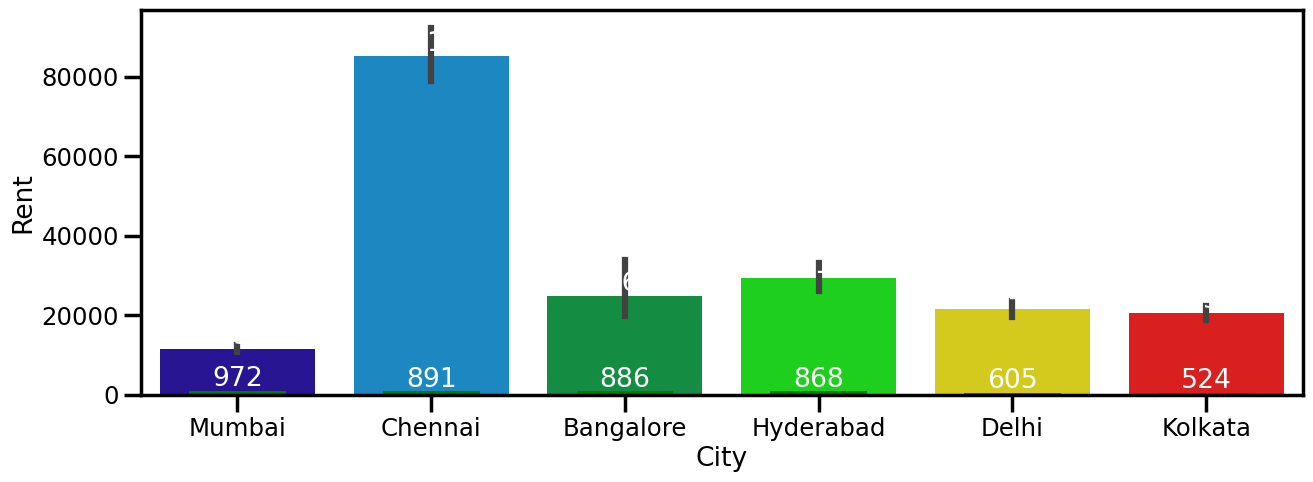

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(x = rent_data["City"], y = rent_data["Rent"], palette = "nipy_spectral")
ax = rent_data["City"].value_counts().plot(kind = 'bar', color = "Green", rot = 0)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 300), ha = 'center', va = 'bottom', color = 'White')

Histogram on House Sizes

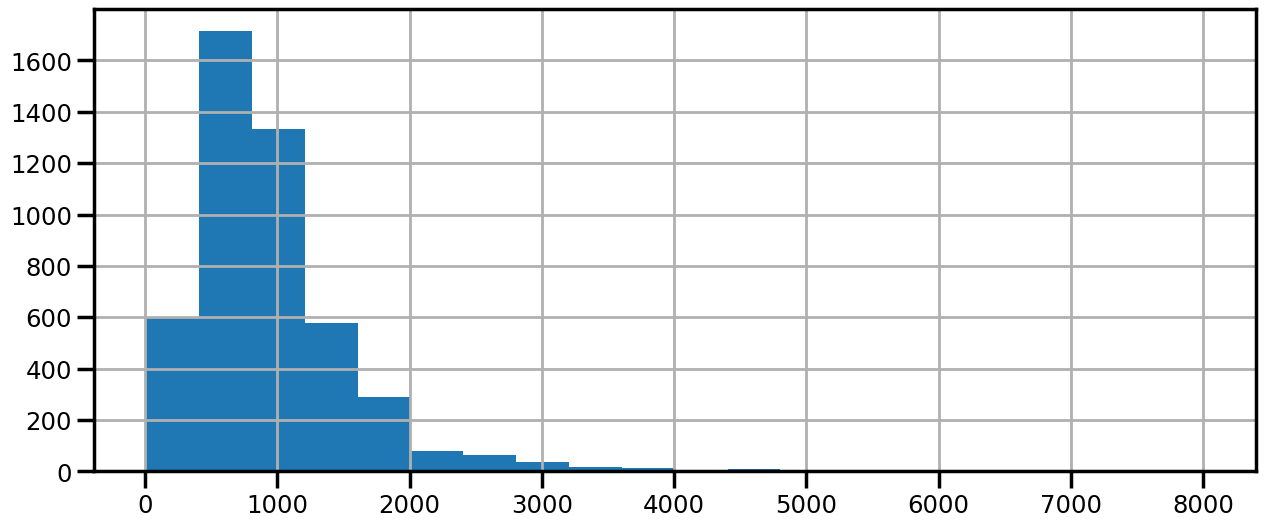

In [ ]:
n_bins = 20
plt.figure(figsize = (15, 6))
rent_data["Size"].hist(bins = n_bins);

Distribution of different number of BHK available in the Dataset

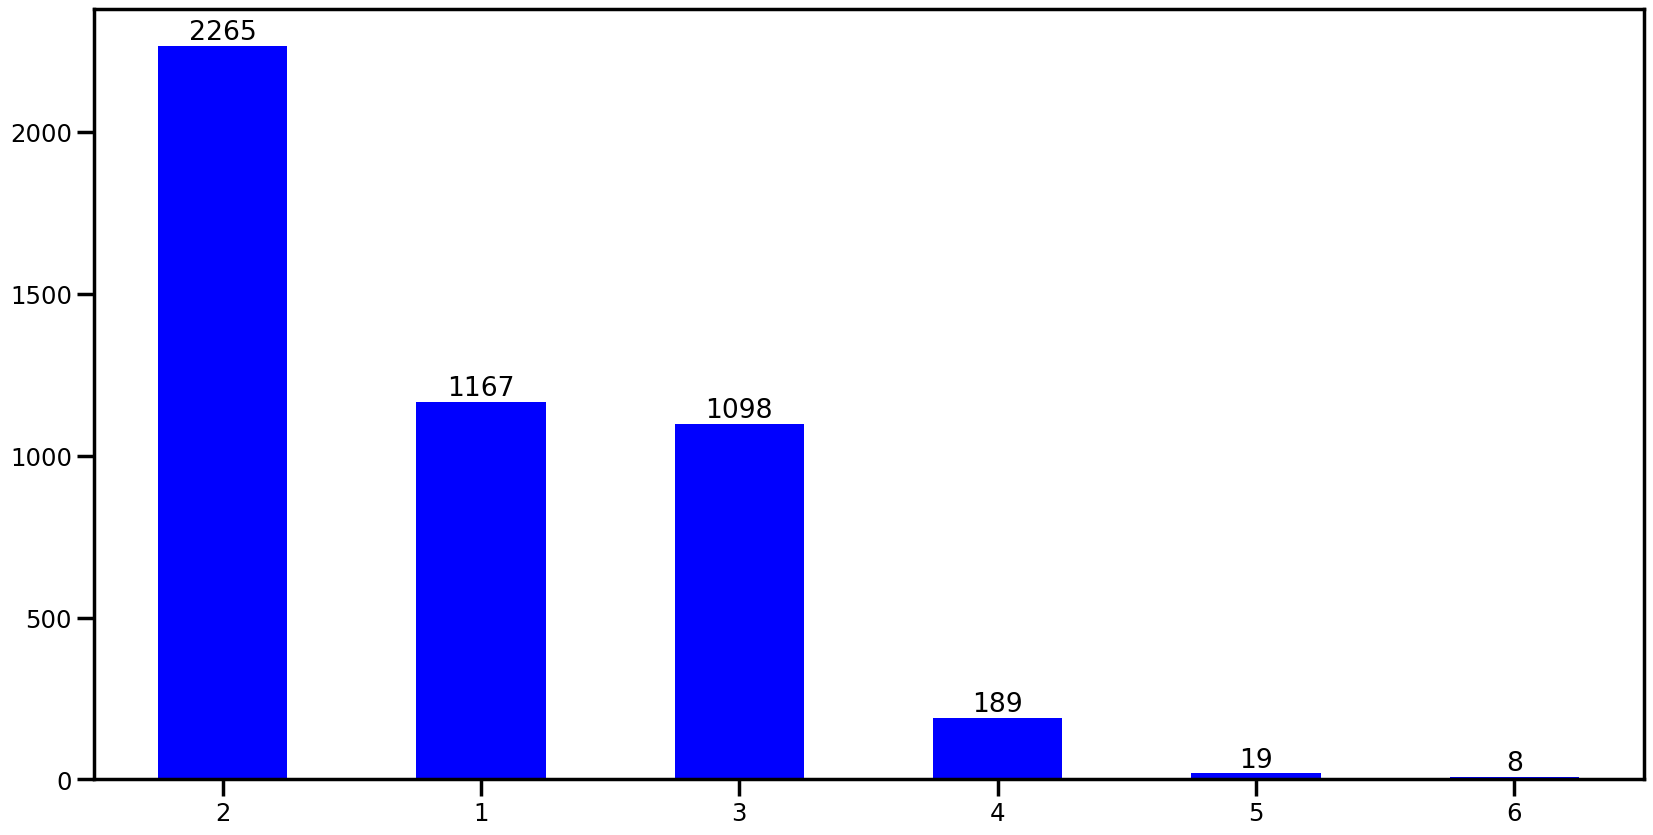

In [ ]:
sns.set_context("poster", font_scale = .8)
plt.figure(figsize = (20, 10))
ax = rent_data["BHK"].value_counts().plot(kind = 'bar', color = "Blue", rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Heatmap on BHK vs Area Type

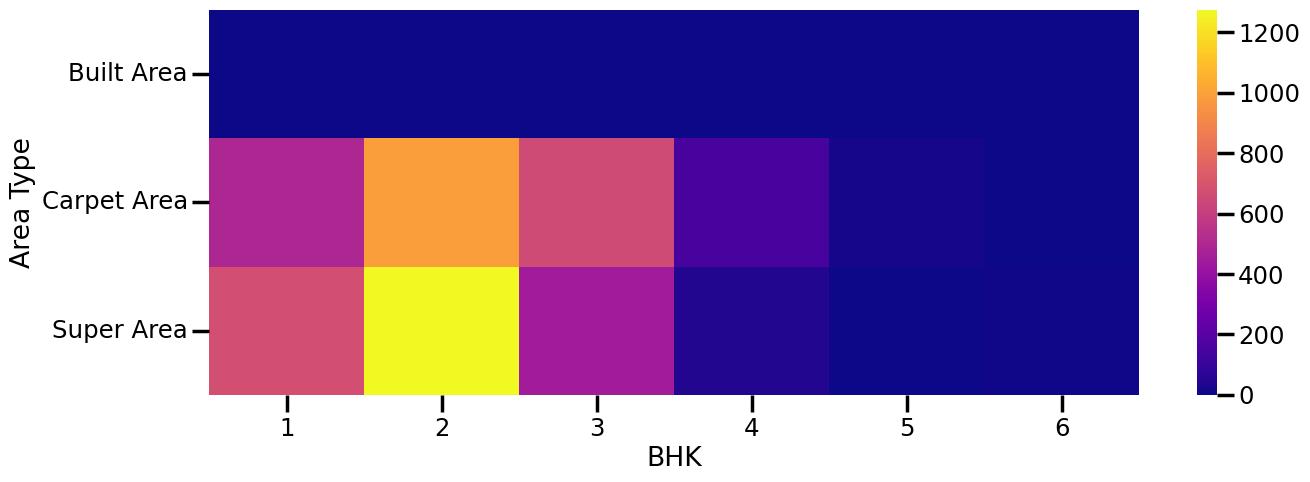

In [ ]:
plt.figure(figsize = (15, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(rent_data["Area Type"], rent_data["BHK"]),  cmap = colormap);

WordCloud on Area Locality

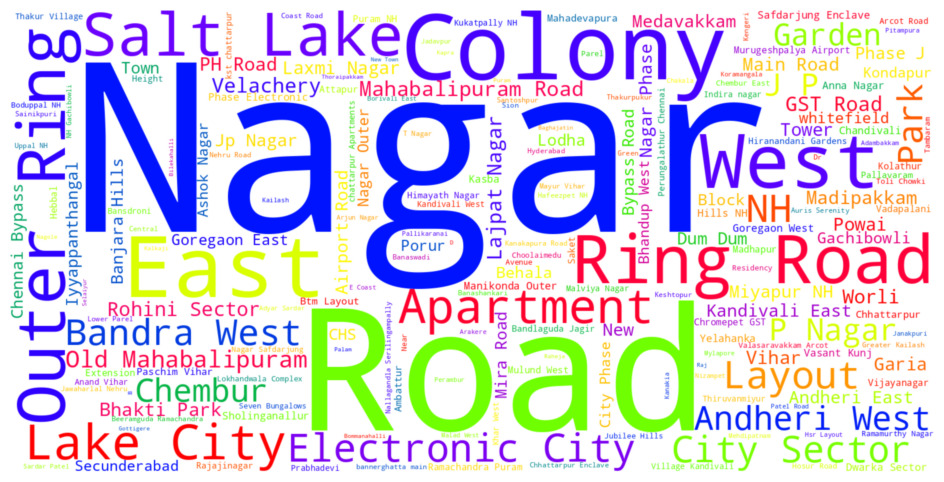

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(Company for Company in rent_data["Area Locality"])
word_cloud = WordCloud(width = 1600, height = 800, colormap = 'prism', background_color = "white").generate(text)
plt.figure(figsize = (30, 6))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

# Traning the Model

Changing string to float

In [ ]:
rent_data["Area Type"] = rent_data["Area Type"].map({"Super Area": 1, "Carpet Area": 2, "Built Area": 3})
rent_data["City"] = rent_data["City"].map({"Mumbai": 4000, "Chennai": 6000, "Bangalore": 5600, "Hyderabad": 5000, "Delhi": 1100, "Kolkata": 7000})
rent_data["Furnishing Status"] = rent_data["Furnishing Status"].map({"Unfurnished": 0, "Semi-Furnished": 1, "Furnished": 2})
rent_data["Tenant Preferred"] = rent_data["Tenant Preferred"].map({"Bachelors/Family": 2, "Bachelors": 1, "Family": 3})
print(rent_data.head())

    Posted On  BHK   Rent  Size            Floor  Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2          1   
1  2022-05-13    2  20000   800       1 out of 3          1   
2  2022-05-16    2  17000  1000       1 out of 3          1   
3  2022-07-04    2  10000   800       1 out of 2          1   
4  2022-05-09    2   7500   850       1 out of 2          2   

              Area Locality  City  Furnishing Status  Tenant Preferred  \
0                    Bandel  7000                  0                 2   
1  Phool Bagan, Kankurgachi  7000                  1                 2   
2   Salt Lake City Sector 2  7000                  1                 2   
3               Dumdum Park  7000                  0                 2   
4             South Dum Dum  7000                  0                 1   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contac

In [ ]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   int64 
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   int64 
 8   Furnishing Status  4746 non-null   int64 
 9   Tenant Preferred   4746 non-null   int64 
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(8), object(4)
memory usage: 445.1+ KB


# Importing Model

In [ ]:
# Multiple linear regression --> more than 1 independent variable
from sklearn.linear_model import LinearRegression
x = rent_data[["BHK", "Size", "Area Type", "City", "Furnishing Status", "Tenant Preferred", "Bathroom"]]       # independent variables | inputs
y = rent_data['Rent']  # depedent variable

In [ ]:
#from sklearn.linear_model imported LinearRegression
from sklearn.model_selection import train_test_split

# splitting the data into training and testing parts
# train : test = 70 : 30
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
#from sklearn.linear_model imported LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
#requirements i.e x.columns
x.columns

Index(['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom'],
      dtype='object')

In [ ]:
requirements = pd.DataFrame([[2, 1100, 1, 7000, 0, 2, 2]], columns=x.columns)
requirements

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,1100,1,7000,0,2,2


In [ ]:
Rent_prediction = model.predict(requirements)
Rent_prediction

array([15426.52996941])

# Testing the Model

In [ ]:
print("Enter House Requirements to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City (Mumbai: 4000, Chennai: 6000, Bangalore: 5600, Hyderabad: 5000, Delhi: 1100, Kolkata: 7000): "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
requirements = pd.DataFrame([[a, b, c, d, e, f, g]], columns=x.columns)
requirements
print("Predicted House Price = ", model.predict(requirements))

Enter House Requirements to Predict Rent
Number of BHK: 3
Size of the House: 1500
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 2
Pin Code of the City (Mumbai: 4000, Chennai: 6000, Bangalore: 5600, Hyderabad: 5000, Delhi: 1100, Kolkata: 7000): 4000
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 2
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 3
Number of bathrooms: 2
Predicted House Price =  [69411.94568438]


## *THANK YOU*



